In [6]:
using NetworkEpidemics
using LightGraphs
using Statistics
using Plots
using ColorSchemes
using Random

In [7]:
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SI}) = Metapopulation(mp.h, mp.D, SI(χ*mp.dynamics.β))
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SIS}) = Metapopulation(mp.h, mp.D, SIS(χ*mp.dynamics.β, mp.dynamics.γ))
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SIR}) = Metapopulation(mp.h, mp.D, SIR(χ*mp.dynamics.β, mp.dynamics.δ))

CorrectedMetapopulation (generic function with 3 methods)

In [8]:
Random.seed!(2020);

In [41]:
N = 100
M = 10

10

In [42]:
h = complete_graph(M)
g = star_graph(N)

{100, 99} undirected simple Int64 graph

In [43]:
k = degree(g)

100-element Array{Int64,1}:
 99
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1

In [44]:
χ₁ = mean(closeness_centrality(g))
χ₂ = mean(k.^2)/(mean(k)*N)
χ₃ = mean(k)/N #ne(g)/(n*(n-1)/2)
χ₄ = global_clustering_coefficient(g)

0.0

In [14]:
β = 0.1 # transmission rate
D = 0.1 # diffusion rate

0.1

In [45]:
mp = Metapopulation(h, D, SI(β))
mp_1 = CorrectedMetapopulation(χ₁, mp)
mp_2 = CorrectedMetapopulation(χ₂, mp)
mp_3 = CorrectedMetapopulation(χ₃, mp)
mp_4 = CorrectedMetapopulation(χ₄, mp)

mpx = Metaplex(g, h, D, SI(β))

Metaplex{SI}({100, 99} undirected simple Int64 graph, {10, 45} undirected simple Int64 graph, [0.1, 0.1], SI(0.1))

In [48]:
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = [div(i-1,div(N,M))+1 for i in 1:N]

100-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  2
  2
  2
  ⋮
  9
  9
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10

In [49]:
x0_mp = Array{Int,2}(undef, M, 2)
x0_mp[2:M,:] .= [100 0]
x0_mp[1, :] .= [90, 10]

2-element view(::Array{Int64,2}, 1, :) with eltype Int64:
 90
 10

In [50]:
# infected seed randomly dispersed over meta-nodes
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = rand(1:M, N)
x0_mp = zeros(Int, M, 2)
for i in 1:N
    x0_mp[x0_μ[i], x0_i[i]] += 1
end

In [26]:
tmax = 500.0
nmax = 1000000
nsims = 200
nbins = 200

200

In [51]:
ts_av_mpx, u_av_mpx = average(mpx, [x0_i,x0_μ], tmax=tmax, nmax=nmax, nbins=nbins, nsims=nsims, progressbar=false);

In [52]:
ts_mf, u_mf = meanfield(mp, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_1, u_mf_1 = meanfield(mp_1, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_2, u_mf_2 = meanfield(mp_2, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_3, u_mf_3 = meanfield(mp_3, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_4, u_mf_4 = meanfield(mp_4, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_mpx, u_mf_mpx = meanfield(mpx, [x0_i,x0_μ], tmax=tmax, saveat=ts_av_mpx)

([0.0, 2.512562814070352, 5.025125628140704, 7.537688442211055, 10.050251256281408, 12.56281407035176, 15.07537688442211, 17.587939698492463, 20.100502512562816, 22.613065326633166  …  477.38693467336685, 479.8994974874372, 482.4120603015075, 484.9246231155779, 487.43718592964825, 489.9497487437186, 492.46231155778895, 494.9748743718593, 497.48743718592965, 500.0], [[6.0 5.0 … 8.0 14.0; 6.687336654207192 5.9333465596258925 … 6.806295586671582 12.719257410857582; … ; 0.06341242960666138 0.06341115714731388 … 0.06338114030101717 0.06342260928144014; 0.06183910474530246 0.06183816530204258 … 0.061816004142252315 0.06184662029138075], [0.0 0.0 … 1.0 2.0; 0.28702917278283935 0.2846107241116459 … 2.437295870075927 1.8191938486573713; … ; 9.936587556533144 9.936588825527448 … 9.936618856233922 9.936577411508809; 9.93816088476572 9.938161821586739 … 9.938183993235493 9.938153395442045]])

In [28]:
colors = ColorSchemes.tab10

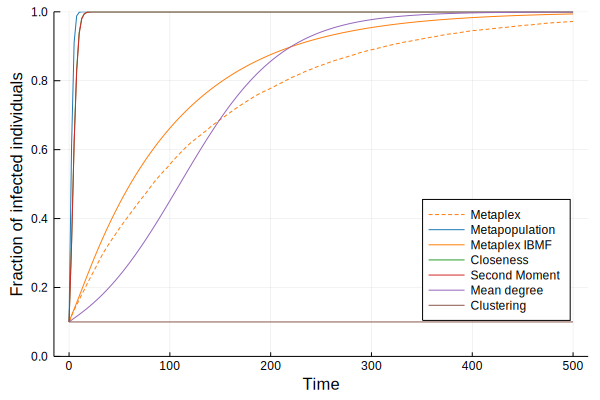

In [53]:
plot(ts_av_mpx, sum(u_av_mpx[2], dims=2)/N,
    label="Metaplex",
    xlabel="Time",
    ylabel="Fraction of infected individuals",
    linestyle=:dash,
    legend=:bottomright,
    color = colors[2],
    ylims = (0.0,1.0)
    )
    plot!(ts_mf, sum(u_mf[2], dims=2)/N,
    #label="Meanfield (No correction)",
    label = "Metapopulation",
#    xlabel="Time",
#    ylabel="Fraction of infected individuals",
    #legend=:bottomright,
    color = colors[1]
    )
    plot!(ts_mf_mpx, sum(u_mf_mpx[2], dims=2)/N,
#    label="Meanfield (Metaplex)",
    label = "Metaplex IBMF",
    color = colors[2]
    )
    plot!(ts_mf_1, sum(u_mf_1[2], dims=2)/N,
#    label="Meanfield (Closeness Centrality)",
    label = "Closeness",
    color = colors[3]
    )
    plot!(ts_mf_2, sum(u_mf_2[2], dims=2)/N,
#    label="Meanfield (Second Moment)",
    label = "Second Moment",
    color = colors[4]
    )
    plot!(ts_mf_3, sum(u_mf_3[2], dims=2)/N,
#    label="Meanfield (Mean degree)",
    label = "Mean degree",
    color = colors[5]
    )
    plot!(ts_mf_4, sum(u_mf_4[2], dims=2)/N,
#    label="Meanfield (Clustering Coefficient)",
    label = "Clustering",
    color = colors[6]
    )